# 数据分析与可视化综合实验
适用于计算机、数据科学、数字媒体等相关专业,其他专业选做。

## 实验目的
1. 熟悉 Python标准库csv的用法。
2. 熟悉CSV和TXT文件操作。
3. 熟练安装扩展库 numpy、 pandas、 matplotlib。
4. 熟悉使用扩展库 pandas进行数据分析的基本操作。
5. 熟悉使用扩展库matplotlib进行数据可视化的基木操作。

## 实验内容
(1)运行下面的程序,在当前文件夹中生成饭店营业额模拟数据文件data.csv。

In [1]:
import csv
import random
import datetime

In [9]:
fn = 'data.csv'
with open(fn,'w')as fp:
    wr = csv.writer(fp,lineterminator='\n')
    wr.writerow(['日期','销量'])
    startDate = datetime.date(2017,1,1)
    for i in range(365):
        amount = 300 + i * 5 + random.randrange(100)
        wr.writerow([str(startDate),amount])
        startDate = startDate + datetime.timedelta(days = 1)

(2)然后完成下面的任务
1. 使用 pandas读取文件data.csv中的数据,创建 DataFrame对象,并删除其中所有缺失值。
2. 使用 matplotlib生成折线图,反映该饭店每天的营业额情况,并把图形保存为本地文件first.jpg。
3. 按月份进行统计,使用 matplotlib绘制柱状图显示每个月份的营业额,并把图形保存为本地文件 second.jpg
4. 按月份进行统计,找出相邻两个月最大涨幅,并把涨幅最大的月份写入文件maxMonth. txt。
5. 按季度统计该饭店2017年的营业额数据,使用 matplotlib生成饼状图显示2017年4个季度的营业额分布情况,并把图形保存为本地文件 third.jpg。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

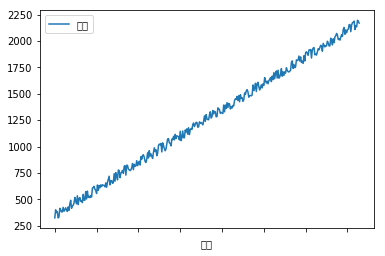

<Figure size 432x288 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#读取数据，丢弃缺失值
df = pd.read_csv('data.csv',encoding='cp936')
df = df.dropna()

#生成营业额折线图
plt.figure()
df.plot(x='日期')
plt.savefig('first.jpg')

#按月份统计，生成柱状图
plt.figure()
df1=df[:]
df1['month'] = df1['日期'].map(lambda x: x[:x.rindex("-")])
df1 = df1.groupby(by='month', as_index=False).sum()
df1.plot(x='month',kind='bar')
plt.savefig('first.jpg')

#查找涨幅最大的月份，写入文件
df2 = df1.drop('month',axis=1).diff()
m = df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt','w') as fp:
    fp.write(df1.loc[m,'month'])

#按季度统计，生成饼状图
plt.figure()
one = df1[:3]['销量'].sum()
two = df1[3:6]['销量'].sum()
three = df1[6:9]['销量'].sum()
four = df1[9:12]['销量'].sum()
plt.pie([one,two,three,four],
    labels=['one','two','three','four'])
plt.savefig('third.jpg')